In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empcolors import get_empo_cat_color
%matplotlib inline

*** Choose 2k or qc-filtered subset (one or the other) ***

In [2]:
path_map = '/Users/luke.thompson/emp/metadata-refine/emp_qiime_mapping_subset_2k.tsv' # already has 90bp data
version = '2k'

In [3]:
path_map = '/Users/luke.thompson/emp/metadata-refine/emp_qiime_mapping_qc_filtered.tsv' # already has 90bp data
version = 'qc'

*** Merged mapping file and alpha-div ***

In [4]:
path_adiv100 = '/Users/luke.thompson/emp/analyses-adiv/04-deblur/oct_11_2016/emp.100/emp.100.min25.deblur.withtax.onlytree_5000.txt'
path_adiv150 = '/Users/luke.thompson/emp/analyses-adiv/04-deblur/oct_11_2016/emp.150/emp.150.min25.deblur.withtax.onlytree_5000.txt'

In [5]:
df_map = pd.read_csv(path_map, sep='\t', index_col=0)
df_adiv100 = pd.read_csv(path_adiv100, sep='\t', index_col=0)
df_adiv150 = pd.read_csv(path_adiv150, sep='\t', index_col=0)

df_adiv100.columns = ['adiv_chao1_100bp', 'adiv_observed_otus_100bp', 'adiv_faith_pd_100bp', 'adiv_shannon_100bp']
df_adiv150.columns = ['adiv_chao1_150bp', 'adiv_observed_otus_150bp', 'adiv_faith_pd_150bp', 'adiv_shannon_150bp']

In [6]:
df_merged = pd.concat([df_adiv100, df_adiv150, df_map], axis=1, join='outer')

*** Removing all samples without 150bp alpha-div results ***

In [7]:
df1 = df_merged[['empo_3', 'adiv_observed_otus', 'adiv_observed_otus_100bp', 'adiv_observed_otus_150bp']]
df1.columns = ['empo_3', 'observed_tag_sequences_90bp', 'observed_tag_sequences_100bp', 'observed_tag_sequences_150bp']
df1.dropna(axis=0, inplace=True)

/Users/luke.thompson/.local/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


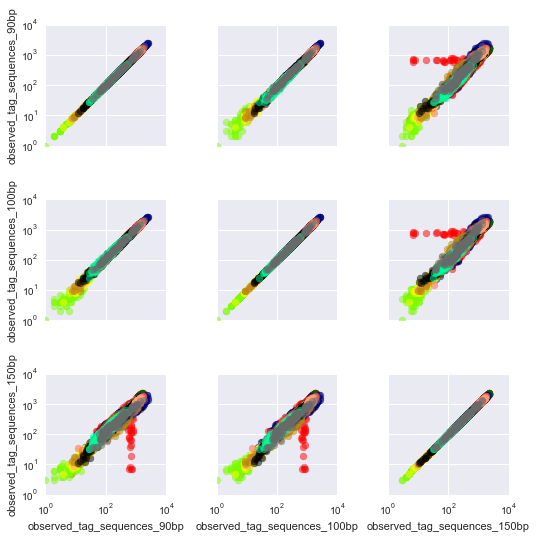

In [8]:
g = sns.PairGrid(df1, hue='empo_3', palette=get_empo_cat_color(returndict=True))
g = g.map(plt.scatter, alpha=0.5)
for i in [0, 1, 2]:
    for j in [0, 1, 2]:
        g.axes[i][j].set_xscale('log')
        g.axes[i][j].set_yscale('log')
        g.axes[i][j].set_xlim([1e0, 1e4])
        g.axes[i][j].set_ylim([1e0, 1e4])
        
#g.savefig('/Users/luke.thompson/emp/analyses-adiv/adiv_%s_scatter.pdf' % version)

(0, 3000)

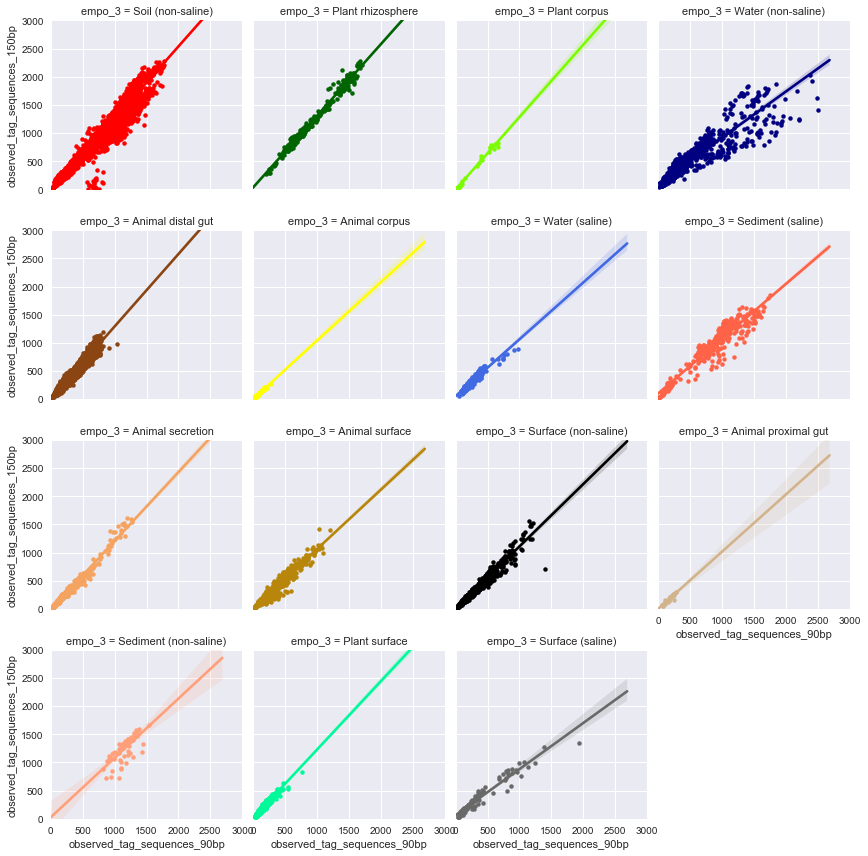

In [9]:
sns.lmplot(x='observed_tag_sequences_90bp', y='observed_tag_sequences_150bp', col='empo_3', hue="empo_3", data=df1,
           col_wrap=4, palette=get_empo_cat_color(returndict=True), size=3, markers='o',
           scatter_kws={"s": 20, "alpha": 1}, fit_reg=True)
plt.xlim([0, 3000])
plt.ylim([0, 3000])
#plt.savefig('/Users/luke.thompson/emp/analyses-adiv/adiv_%s_lmplot.pdf' % version)

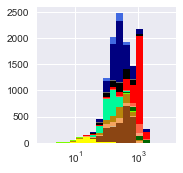

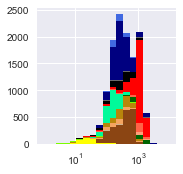

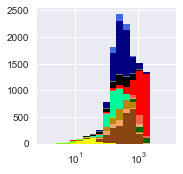

In [10]:
df1melt = pd.melt(df1, id_vars='empo_3')
empo_list = list(set(df1melt.empo_3))
empo_list = [x for x in empo_list if type(x) is str]
empo_list.sort()
empo_colors = [get_empo_cat_color(returndict=True)[x] for x in empo_list]

for var in ['observed_tag_sequences_90bp', 'observed_tag_sequences_100bp', 'observed_tag_sequences_150bp']:
    list_of = [0] * len(empo_list)
    df1melt2 = df1melt[df1melt['variable'] == var].drop('variable', axis=1)
    for empo in np.arange(len(empo_list)):
        list_of[empo] = list(df1melt2.pivot(columns='empo_3')['value'][empo_list[empo]].dropna())

    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(2.5,2.5))    
    plt.hist(list_of, color=empo_colors, 
            bins=np.logspace(np.log10(1e0),np.log10(1e4), 20),
            stacked=True)
    plt.xscale('log')

    #fig.savefig('/Users/luke.thompson/emp/analyses-adiv/adiv_%s_hist_%s.pdf' % (version, var))

In [11]:
df1

,empo_3,observed_tag_sequences_90bp,observed_tag_sequences_100bp,observed_tag_sequences_150bp
1001.SKB1,Soil (non-saline),945.0,1011.0,1029.0
1001.SKB2,Soil (non-saline),1032.0,1073.0,1080.0
1001.SKB3,Soil (non-saline),1019.0,1093.0,1137.0
1001.SKB4,Soil (non-saline),851.0,923.0,975.0
1001.SKB5,Soil (non-saline),814.0,846.0,831.0
1001.SKB6,Soil (non-saline),828.0,875.0,895.0
1001.SKB7,Plant rhizosphere,208.0,243.0,273.0
1001.SKB8,Plant rhizosphere,252.0,271.0,290.0
1001.SKB9,Plant rhizosphere,277.0,288.0,354.0
1001.SKD2,Soil (non-saline),824.0,877.0,868.0
